<font size="5">EDA and Visualization</font>

# Content
This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

References
United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

Inspiration:
Suicide Prevention.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.shape

(27820, 12)

In [4]:
## Summarizing the data
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
## Renaming some columns for better interpretation
df.rename(columns={" gdp_for_year ($) ":
                  "gdp_for_year", "gdp_per_capita ($)":
                  "gdp_per_capita"}, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Text(0, 0.5, 'suicides_no')

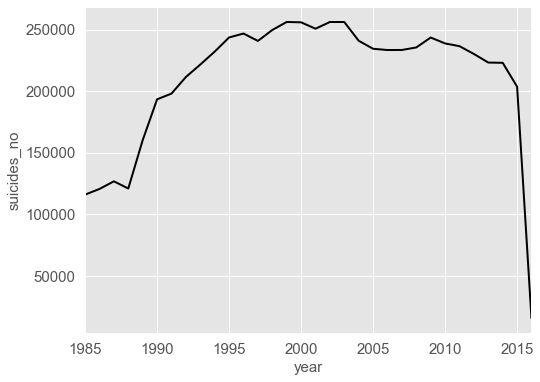

In [6]:
## Suicides number curve (1985-2016)
ns = df['suicides_no'].groupby(df.year).sum()
ns.plot(figsize=(8,6), linewidth=2, fontsize=15,color='black')
plt.xlabel('year', fontsize=15)
plt.ylabel('suicides_no',fontsize=15)


<font size="2">According to this plot numbers of suicides had been decreasing overall</font>

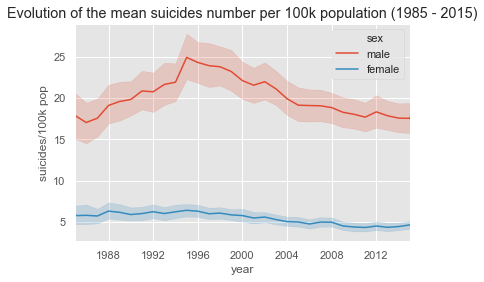

In [7]:
## Mean suicides number by gender and 100k population
df["year"] = pd.to_datetime(df["year"], format = "%Y")

data = df.groupby(["year", "sex"]).agg("mean").reset_index()
sns.lineplot(x = "year", y = "suicides/100k pop", hue = "sex", data = df)
plt.xlim("1985", "2015")
plt.title("Evolution of the mean suicides number per 100k population (1985 - 2015)");

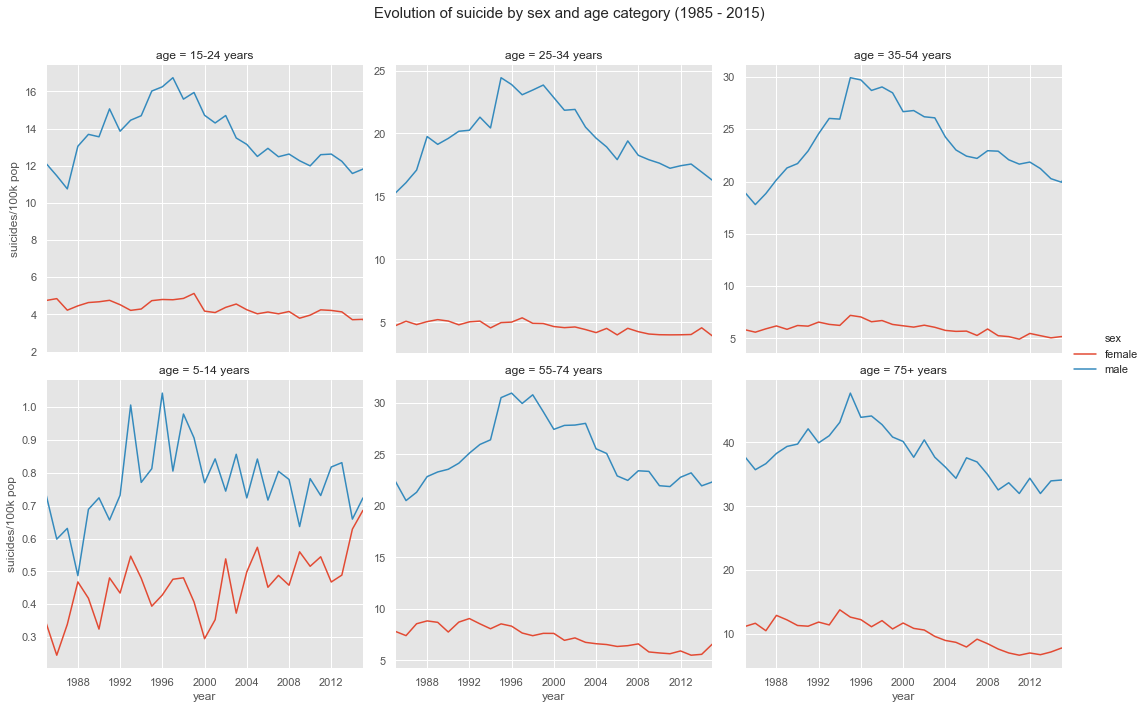

In [8]:
df_1 = df.groupby(["year", "sex", "age"]).agg("mean").reset_index()

sns.relplot(x = "year", y = "suicides/100k pop", 
            hue = "sex", col = "age", col_wrap = 3, data = df_1, 
            facet_kws=dict(sharey=False), kind = "line")

plt.xlim("1985", "2015")
plt.subplots_adjust(top = 0.9)
plt.suptitle("Evolution of suicide by sex and age category (1985 - 2015)", size=15);

In [9]:
## Number of suicides in 1985
year_1985 = df[(df['year'] == 1985)]
year_1985
year_1985 = year_1985.groupby('country')[['suicides_no']].sum().reset_index()

## Sorting values in ascending order
year_1985 = year_1985.sort_values(by='suicides_no', ascending=False)

## Styling output dataframe
year_1985.style.background_gradient(cmap='Purples', subset=['suicides_no'])

,country,suicides_no


In [10]:
#Number of suicides in 2016
year_2016 = df[(df['year'] == 2016)]
year_2016 = year_2016.groupby('country')[['suicides_no']].sum().reset_index()

# Sort values in ascending order
year_2016 = year_2016.sort_values(by='suicides_no', ascending=False)

# Styling output dataframe
year_2016.style.background_gradient(cmap='Oranges', subset=['suicides_no'])

,country,suicides_no


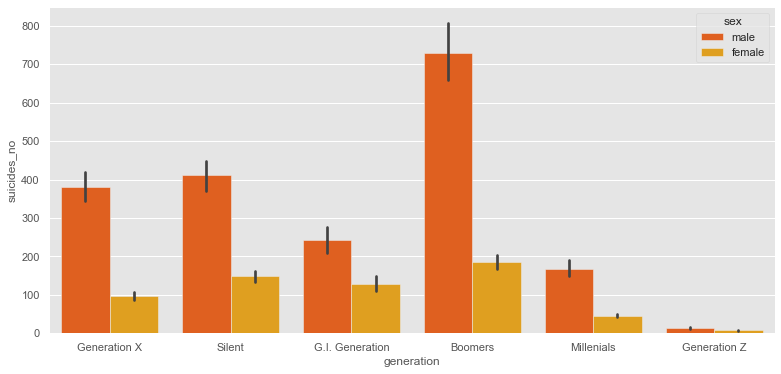

In [11]:
## Suicides number by generation and sex
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['generation'], y = 'suicides_no',
                  hue='sex',data=df, palette='autumn')

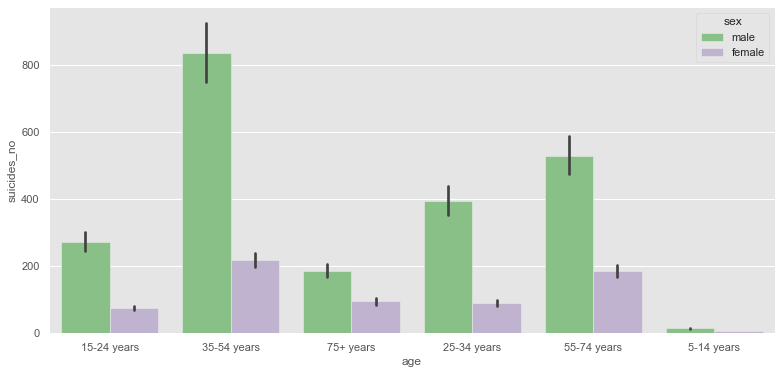

In [12]:
## Suicides number by age and sex
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['age'], y = 'suicides_no',
                  hue='sex',data=df, palette='Accent')

<font size="2">These barplots show that generation of boomers have the highest suicide rate, males in general are more likely to commit suicides than females as well as people from age groups 35-54 yrs and 55-74 yrs</font>

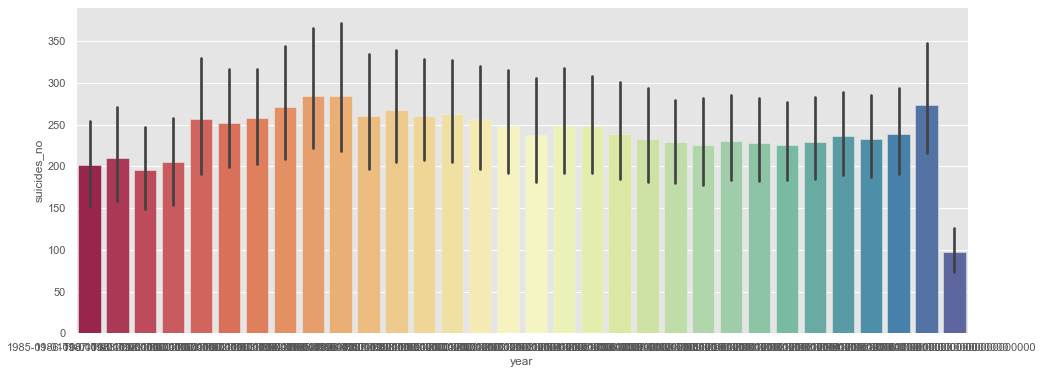

In [13]:
## Suicides number by year
f,ax = plt.subplots(1,1,figsize=(16,6))
ax = sns.barplot(x = df['year'], y = 'suicides_no',
                data=df, palette='Spectral')

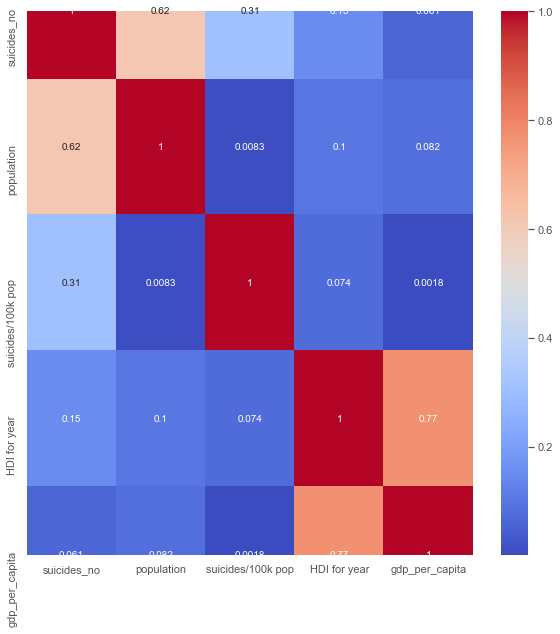

In [14]:
## Correlation of features
f,ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

<font size="2">The correlation between the factors except population with GDP for year is low</font>

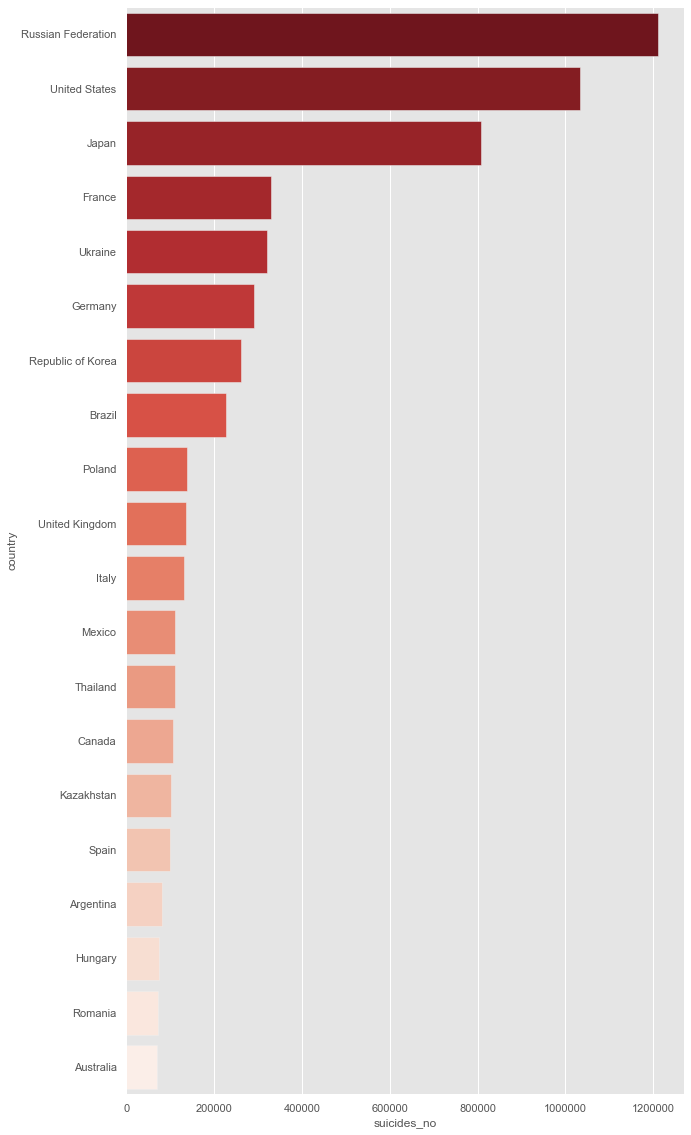

In [15]:
data = df['suicides_no'].groupby(df.country).sum().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(10,20))
ax = sns.barplot(data.head(20), data.head(20).index, palette='Reds_r')

<font size="2">The highest number of suicides is in Russian Federation</font>

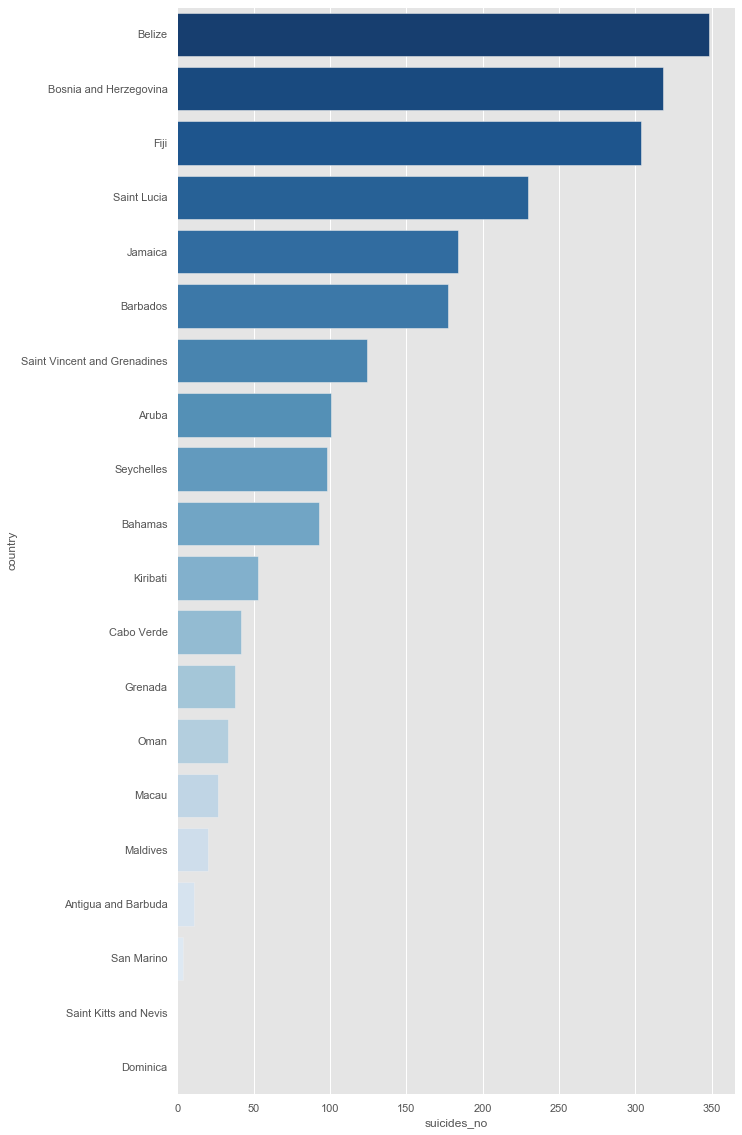

In [16]:
data = df['suicides_no'].groupby(df.country).sum().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(10,20))
ax = sns.barplot(data.tail(20),data.tail(20).index,palette='Blues_r')

<font size="2">The lowest number of suicides is in San Marino</font>

In [17]:
## Suicides number by year (high to low)
year_suicides = df.groupby('year')[['suicides_no']].sum().reset_index()
year_suicides.sort_values(by='suicides_no', ascending=False).style.background_gradient(cmap='Greens', subset=['suicides_no'])

,year,suicides_no
14,1999-01-01 00:00:00,256119
17,2002-01-01 00:00:00,256095
18,2003-01-01 00:00:00,256079
15,2000-01-01 00:00:00,255832
16,2001-01-01 00:00:00,250652
13,1998-01-01 00:00:00,249591
11,1996-01-01 00:00:00,246725
10,1995-01-01 00:00:00,243544
24,2009-01-01 00:00:00,243487
19,2004-01-01 00:00:00,240861


<font size=2>The highest number of suicides was in 1999 and the lowest in 2016</font>

In [18]:
## Suicides number by age group
age_grp = df.groupby('age')[['suicides_no']].sum().reset_index()
age_grp.sort_values(by='suicides_no', ascending=False).style.background_gradient(cmap='Greys', subset=['suicides_no'])

,age,suicides_no
2,35-54 years,2452141
4,55-74 years,1658443
1,25-34 years,1123912
0,15-24 years,808542
5,75+ years,653118
3,5-14 years,52264


<font size=2> People with age 35-54 and 55-74 committed suicides the most</font>

In [19]:
## Suicides number per 100k population
per100k = df.groupby(['country', 'year'])[['suicides/100k pop']].sum().reset_index()
per100k.sort_values(by='suicides/100k pop', ascending=False).head(20).style.background_gradient(cmap='Reds', subset=['suicides/100k pop'])

,country,year,suicides/100k pop
1255,Lithuania,1995-01-01 00:00:00,639.3
1256,Lithuania,1996-01-01 00:00:00,595.61
948,Hungary,1991-01-01 00:00:00,575
1260,Lithuania,2000-01-01 00:00:00,571.8
949,Hungary,1992-01-01 00:00:00,570.26
1261,Lithuania,2001-01-01 00:00:00,568.98
1752,Russian Federation,1994-01-01 00:00:00,567.64
1258,Lithuania,1998-01-01 00:00:00,566.36
1257,Lithuania,1997-01-01 00:00:00,565.44
1259,Lithuania,1999-01-01 00:00:00,561.53


<font size=2> Lithuania has the highest number of suicides per 100k population </font>

<font size="2">There are missing values in our dataset (HDI for year). Let's check how many</font>

In [20]:
df.count()

country              27820
year                 27820
sex                  27820
age                  27820
suicides_no          27820
population           27820
suicides/100k pop    27820
country-year         27820
HDI for year          8364
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64

<font size="2">Since HDI for year is continious, we can fill those missing values with mean values</font>

In [21]:
df.fillna(df.mean(), inplace=True)

## We don't need the column "country-year", so we'll just drop it
df.drop("country-year", axis=1, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987-01-01,male,15-24 years,21,312900,6.71,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987-01-01,male,35-54 years,16,308000,5.19,0.776601,"2,156,624,900",796,Silent
2,Albania,1987-01-01,female,15-24 years,14,289700,4.83,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987-01-01,male,75+ years,1,21800,4.59,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987-01-01,male,25-34 years,9,274300,3.28,0.776601,"2,156,624,900",796,Boomers


In [22]:
df.count()

country              27820
year                 27820
sex                  27820
age                  27820
suicides_no          27820
population           27820
suicides/100k pop    27820
HDI for year         27820
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64

<font size="2">As we can see, there are no missing values anymore. Now we need to check the type of our data</font>

In [23]:
df.dtypes

country                      object
year                 datetime64[ns]
sex                          object
age                          object
suicides_no                   int64
population                    int64
suicides/100k pop           float64
HDI for year                float64
gdp_for_year                 object
gdp_per_capita                int64
generation                   object
dtype: object

In [24]:
(df.dtypes=="object").index[df.dtypes=="object"]

Index(['country', 'sex', 'age', 'gdp_for_year', 'generation'], dtype='object')

In [25]:
## Turning object types into category and integer types
df[["country","age","sex","generation"]] = df[["country","age","sex","generation"]].astype("category")
## Converting number strings with commas into integer
df['gdp_for_year'] = df['gdp_for_year'].str.replace(",", "").astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
country              27820 non-null category
year                 27820 non-null datetime64[ns]
sex                  27820 non-null category
age                  27820 non-null category
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides/100k pop    27820 non-null float64
HDI for year         27820 non-null float64
gdp_for_year         27820 non-null float64
gdp_per_capita       27820 non-null int64
generation           27820 non-null category
dtypes: category(4), datetime64[ns](1), float64(3), int64(3)
memory usage: 1.6 MB


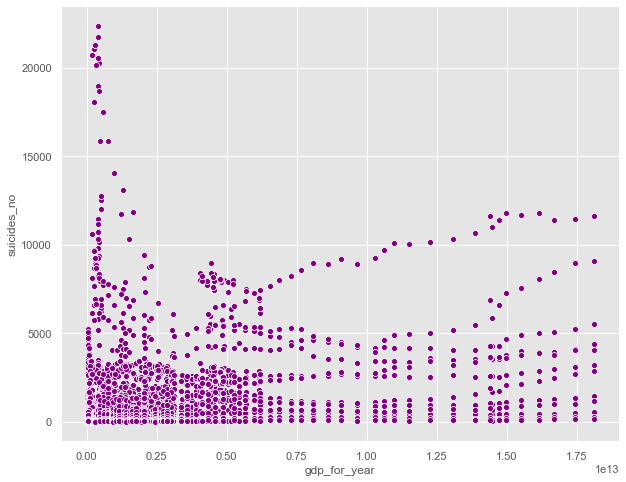

In [26]:
## Checking the relationship between gdp for year and number of suicides
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="gdp_for_year", y="suicides_no", data=df, color='purple')

<font size="2">The relationship between "gdp_for_year" and "suicides_no" is not linear. Hence, GDP is not something that has a real impact on suicide rate </font>

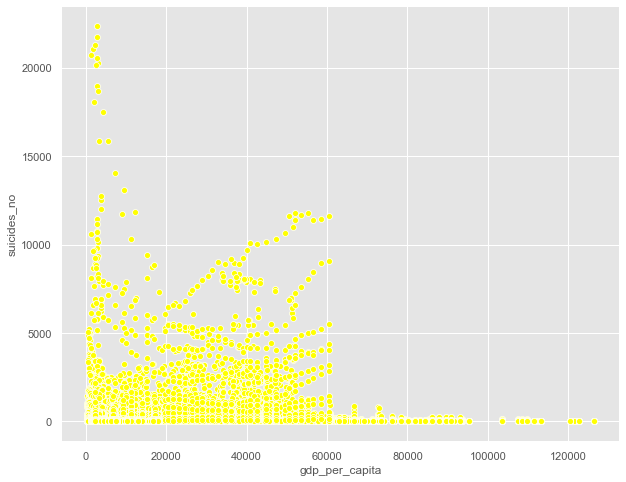

In [27]:
## Checking the relationship between gdp per capita and number of suicides
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="gdp_per_capita", y="suicides_no", data=df, color='yellow')

<font size=2> Again, GDP has no real impact on suicide rate </font>

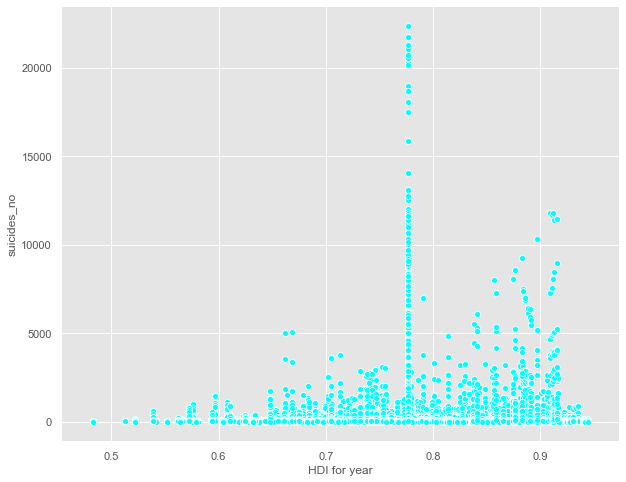

In [28]:
## Checking the relationship between Hdi and number of suicides
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="HDI for year", y="suicides_no", data=df, color='cyan')

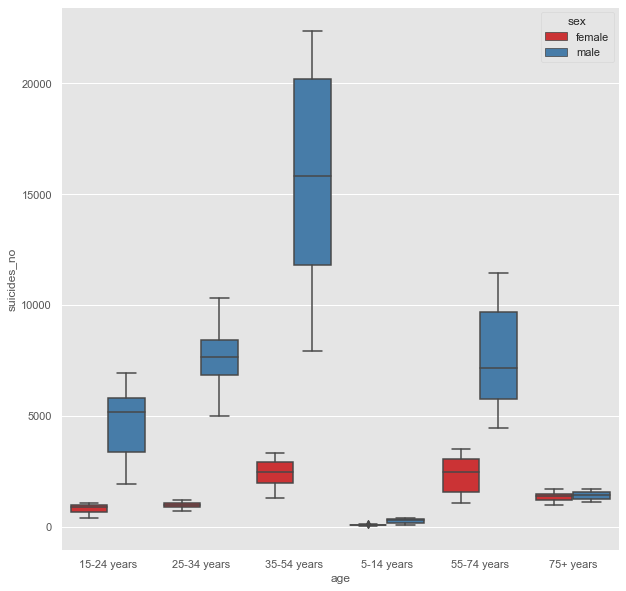

In [29]:
##Suicides by age and gender in Russian Federation
f, ax = plt.subplots(1,1, figsize=(10,10))
ax = sns.boxplot(x='age', y='suicides_no', hue='sex',
                 data=df[df['country']=='Russian Federation'],
                 palette='Set1')

<font size='2'> Males in Russia aged from 35 to 54 yrs and females aged 55-74 yrs commit suicide more often </font>

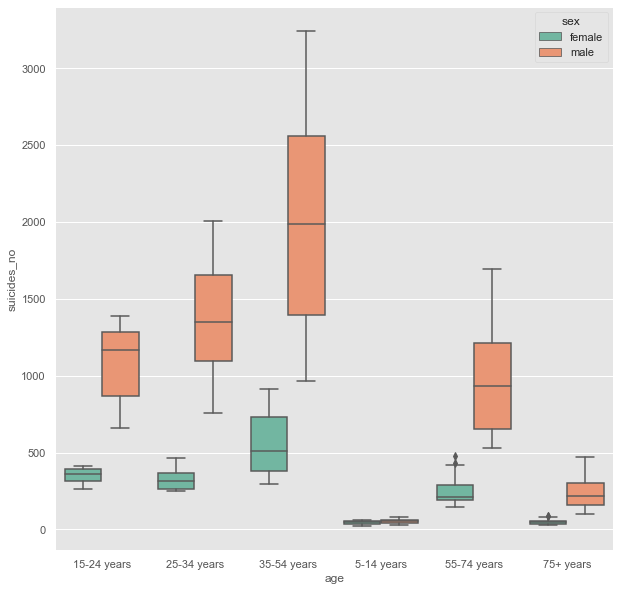

In [30]:
##Suicides by age and gender in Brazil
f, ax = plt.subplots(1,1, figsize=(10,10))
ax = sns.boxplot(x='age', y='suicides_no', hue='sex',
                 data=df[df['country']=='Brazil'],
                 palette='Set2')

<font size='2'> In Brazil both males and females commit suicides mostly at age 35-54 </font>

<font size="5">Machine Learning</font>

In [31]:
## Using cat.codes method to convert category into numerical labels
columns = df.select_dtypes(['category']).columns
df[columns] = df[columns].apply(lambda fx: fx.cat.codes)
df.dtypes

country                        int8
year                 datetime64[ns]
sex                            int8
age                            int8
suicides_no                   int64
population                    int64
suicides/100k pop           float64
HDI for year                float64
gdp_for_year                float64
gdp_per_capita                int64
generation                     int8
dtype: object

<font size="3">**K-means Clustering**<font>

<font size='2'>The task is to cluster the countries into two groups - the ones with high number of suicides and the ones with low number of suicides. For that we have to drop the 'suicides_no' column from the dataset and make it unlabeled</font>

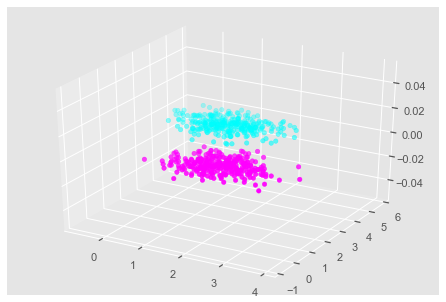

In [36]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
x = df.drop('suicides_no', axis=True)
x = df.drop('year', axis=True)
y = df['suicides_no']
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
y_kmeans = kmeans.predict(x)
x, y_kmeans = make_blobs(n_samples=600, centers=2, cluster_std=0.60, random_state=0)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:,1], c=y_kmeans, cmap='cool')

In [37]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x, y_kmeans))

0.7107290505066529


<font size='2'>The model was able to cluster correctly with a 71% </font>

<font size='5'>Conclusions</font>


<font size='2'> K-means clustering algorithm (which found a strong structure in our dataset) was easy to implement in this case, since we had some domain knowledge that told us the number of suicides committed by people in different countries, so we didn't have to pre-specify the number of clusters(k). As for suicides and factors that influence them one can say while age and gender can be some of those factors, Gdp and Hdi not really, because even in countries with high Gdp and Hdi a lot of people commit suicide. Other than that, there's not enough data available for better analysis, as there are other biological, psychological and social factors that may cause suicides (race, ethnicity, social isolation, contagion, religion, etc.), as well as geographical (climate)</font>